In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

In [2]:
# HIDDEN
def dist_sum(n, probs_0_through_N):
    """Return the distribution of S_n,
    the sum of n i.i.d. copies
    of a random variable with distribution probs_0_through_N
    on the integers 0, 1, 2, ..., N"""
    
    # Find the possible values of S_n
    N = len(probs_0_through_N) - 1   
    values_Sn = np.arange(n*N + 1)
    
    # Find the probailities of those values
    coeffs_X1 = np.flipud(probs_0_through_N)
    pgf_X1 = np.poly1d(coeffs_X1)
    pgf_Sn = pgf_X1**n
    coeffs_Sn = pgf_Sn.c
    probs_Sn = np.flipud(coeffs_Sn)
    
    t = Table().with_columns(
        'Value', values_Sn,
        'Probability', probs_Sn
    )
    return t

## The Sample Mean ##

What's central about the Central Limit Theorem? One answer is that it allows us to make inferences based on random samples when we don't know much about the distribution of the population. For data scientists, that's very valuable.

In Data 8 you saw that if we want estimate the mean of a population, we can construct confidence intervals for the parameter based on the mean of a large random sample. In that course you used the bootstrap to generate an empirical distribution of the sample mean, and then used the empirical distribution to create the confidence interval. You will recall that those empirical distributions were invariably bell shaped.

In this section we will study the probability distribution of the sample mean and show that you can use it to construct confidence intervals for the population mean without any resampling.

Let's start with the sample sum, which we now understand well. Recall our assumptions and notation:

Let $X_1, X_2, \ldots, X_n$ be an i.i.d. sample, and let each $X_i$ have mean $\mu$ and $SD$ $\sigma$. Let $S_n$ be the sample sum, that is, $S_n = \sum_{i=1}^n X_i$. We know that

$$
E(S_n) = n\mu ~~~~~~~~~~  SD(S_n) = \sqrt{n}\sigma
$$

These results imply that as the sample size increases, the distribution of the sample sum moves to the right and becomes more spread out.

You can see this in the graph below. The graph shows the distributions of the sum of 5 rolls and the sum of 20 rolls of a die. The distributions are exact, calculated using the function `dist_sum` defined using pgf methods earlier in this chapter.

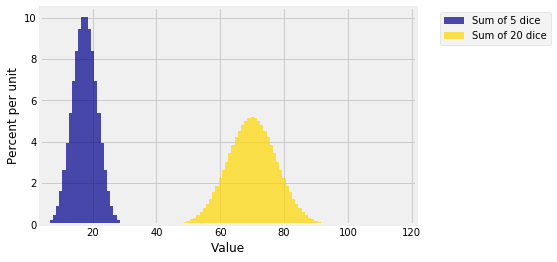

In [3]:
die = np.append(0, (1/6)*np.ones(6))
dist_sum_5 = dist_sum(5, die)
dist_sum_20 = dist_sum(20, die)
Plots('Sum of 5 dice', dist_sum_5, 'Sum of 20 dice', dist_sum_20)

You can see the normal distribution appearing already for the sum of 5 and 20 dice. 

The gold histogram is more spread out than the blue. Because both are probability histograms, both have 1 as their total area. So the gold histogram has to be lower than the blue.

Now let's look at the spread more carefully.

You can see also that the gold distribution isn't four times as spread out as the blue, though the sample size in the gold distribution is four times that of the blue. The gold distribution is twice as spread out (and therefore half as tall) as the blue. That is because the SD of the sum is proportional to $\sqrt{n}$. It grows slower than $n$. Because the sample size is larger by a factor of 4, the SD of the gold distribution is $\sqrt{4} = 2$ times the SD of the blue.

The *average* of the sample behaves differently.

In [4]:
# VIDEO: IID Sample Mean
from IPython.display import YouTubeVideo

YouTubeVideo('UjxM2o6nlbc')

### The Mean of an IID Sample ###
Let $\bar{X}_n$ be the sample mean, that is,

$$
\bar{X}_n = \frac{S_n}{n}
$$

Then $\bar{X}_n$ is just a linear transformation of $S_n$. So

$$
E(\bar{X}_n) = \frac{E(S_n)}{n} = \frac{n\mu}{n} = \mu ~~~~ \text{for all }n
$$

The expectation of the sample mean is always the underlying population mean $\mu$, no matter what the sample size. Therefore, no matter what the sample size, the sample mean is an unbiased estimator of the population mean.

The SD of the sample mean is

$$
SD(\bar{X}_n) = \frac{SD(S_n)}{n} = \frac{\sqrt{n}\sigma}{n} = \frac{\sigma}{\sqrt{n}}
$$

The variability of the sample mean decreases as the sample size increases. So, as the sample size increases, the sample mean becomes a more accurate estimator of the population mean.

The graph below shows the distributions of the means of 5 rolls of a die and of 20 rolls. Both are centered at 3.5 but the distribution of the mean of the larger sample is narrower. You saw this frequently in Data 8: as the sample size increases, the distribution of the sample mean gets more concentrated around the population mean.

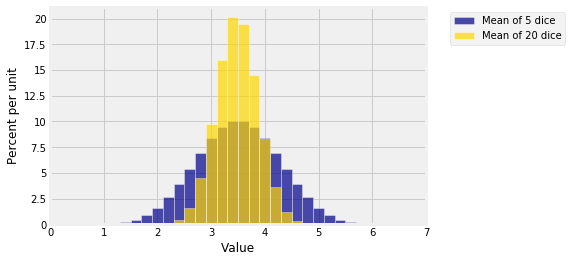

In [5]:
# NO CODE
dist_mean_5 = Table().with_columns(
    'Value', dist_sum_5.column(0)/5,
    'Probability', dist_sum_5.column(1)
    )
dist_mean_20 = Table().with_columns(
    'Value', dist_sum_20.column(0)/20,
    'Probability', dist_sum_20.column(1)
    )
Plots('Mean of 5 dice', dist_mean_5, 'Mean of 20 dice', dist_mean_20, width=0.2)

### Square Root Law ###
Accuracy doesn't come cheap. The SD of the i.i.d. sample mean decreases according to the square root of the sample size. Therefore if you want to decrease the SD of the sample mean by a factor of 3, you have to increase the sample size by a factor of $3^2 = 9$.

The general result is usually stated in the reverse.

**Square Root Law:**
If you multiply the sample size by a factor, then the SD of the i.i.d. sample mean decreases by the square root of the factor.

In [6]:
# VIDEO: Weak Law of Large Numbers

YouTubeVideo('WowLqZku3X8')

### Weak Law of Large Numbers ###
The sample mean is an unbiased estimator of the population mean and has a small SD when the sample size is large. So the mean of a large sample is close to the population mean with high probability. 

The formal result is called the *Weak Law of Large Numbers*. 

Let $X_1, X_2, \ldots, X_n$ be i.i.d., each with mean $\mu$ and SD $\sigma$, and let $\bar{X}_n$ be the sample mean. Fix any number $\epsilon > 0$; it is best to imagine $\epsilon$ to be very small. Then

$$
P(\vert \bar{X}_n - \mu \vert < \epsilon) \to 1 ~~~ \text{as } n \to \infty
$$

That is, for large $n$ it is almost certain that the sample average is in the range $\mu \pm \epsilon$.

To prove the law, we will show that $P(\vert \bar{X}_n - \mu \vert \ge \epsilon) \to 0$. This is straightforward by Chebyshev's Inequality.

$$
P(\vert \bar{X}_n - \mu \vert \ge \epsilon)~ \le ~ \frac{\sigma_{\bar{X}_n}^2}{\epsilon^2} 
~ = ~ \frac{\sigma^2}{n\epsilon^2} ~ \to ~ 0 ~~~ \text{as } n \to \infty
$$

In the terminology of probability theory, the result above is the same as saying that the i.i.d. sample mean *converges in probability* to the population mean. In the terminology of statistical inference, the result says that the i.i.d. sample mean is a *consistent* estimator of the population mean.

```{admonition} Quick Check
$X_1, X_2, \ldots $ are i.i.d. Poisson $(5)$ random variables. When $n$ is large, the value of $\frac{1}{n}\sum_{i=1}^n X_i$ is highly likely to be close to one number. What's that number, and why?

```

```{admonition} Answer
:class: dropdown
5 by the Weak Law

```

### Related Laws ###
- **Strong Law of Large Numbers.** This says that if you have a large iid then sample, then with probability 1 the running sample averages converge to a limit, and that limit is the constant $\mu$. See [this blog post by Fields Medalist Terence Tao](https://terrytao.wordpress.com/2008/06/18/the-strong-law-of-large-numbers/). He states the laws in the case where the underlying SDs may not exist. Note that our proof of the Weak Law is not valid in that case; the result is still true but the proof needs more care.
- **Law of Small Numbers.** This is the title of a book by [Ladislaus Bortkiewicz](https://en.wikipedia.org/wiki/Ladislaus_Bortkiewicz) (1868-1931) in which he described the Poisson approximation to distributions of rare events. That's why Section 6.4 of these notes is called the Law of Small Numbers.
- **Law of Averages.** This is a common name for the Weak Law in the case where the population is binary and the sample mean is just the proportion of successes in the sample. In common usage, people sometimes forget that the law is a limit statement. If you are tossing a fair coin and have seen 10 heads in a row, the chance that the next toss is a head is still 1/2. The law of averages does not say that you are "due for a tail". It doesn't apply to finite sets of tosses.

### The Shape of the Distribution ###
The Central Limit Theorem tells us that for large samples, the distribution of the sample mean is roughly normal. The sample mean is a linear transformation of the the sample sum. So if the distribution of the sample sum is roughly normal, the distribution of the sample mean is roughly normal as well, though with different parameters. Specifically, for large $n$,

$$
P(\bar{X}_n \le x) ~ \approx ~ \Phi \big{(} \frac{x - \mu}{\sigma/\sqrt{n}} \big{)} ~~~~ \text{for all } x
$$



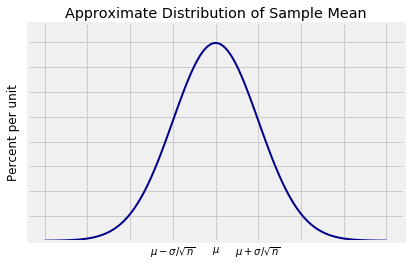

In [7]:
# NO CODE
Plot_norm(x_limits=(-4, 4), mu=0, sigma=1)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.xticks(np.arange(-4, 4.1),['','','','$\mu - \sigma/\sqrt{n}$', '$\mu$', '$\mu+\sigma/\sqrt{n}$','',''])
plt.title('Approximate Distribution of Sample Mean');

The expectation stays the same no matter what $n$ is. But as $n$ gets large, the SD of the sample mean gets smaller. So the curve above starts looking like a spike at $\mu$.